In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [2]:
# Authentication

consumer_key = "VCXi57kKSV9XknYF6URbKsZLX"
consumer_secret = "RLRuh0KUVgGjGjGczmRIC66HbyUPrM6ltM9pVGXigI0Ub15qyd"
access_token = "722625417081802756-Ma1ZvIpwrIZQK4K83umzgMSHQhg5bVr"
access_token_secret = "tjuHWYt23cLjpqJIo3ewTMKV9zmcPiKFGXatmSdd5ksBO"

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [3]:
df = pd.DataFrame(columns=["User","IsVerified","Tweet"])
print(df)

Empty DataFrame
Columns: [User, IsVerified, Tweet]
Index: []


In [4]:
# Fungsi untuk mengekstrak tweet

def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search_tweets, q=Topic,count=1000, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [5]:
# Memanggil fungsi untuk ekstrak data

Topic=["MobileLegendsOL"]
get_tweets(Topic , Count=1000)

Unexpected parameter: exclude


99

Unexpected parameter: exclude


199

Unexpected parameter: exclude


Unexpected parameter: exclude


Unexpected parameter: exclude


Unexpected parameter: exclude


Unexpected parameter: exclude


In [6]:
df.head(8)

,User,IsVerified,Tweet
0,Frendi chou,False,@MobileLegendsOL @sirE I reported the bug yest...
1,Frendi chou,False,"@MobileLegendsOL I reported the bug yesterday,..."
2,miles.,False,I REPORTED IT @MobileLegendsOL do your work an...
3,Anita Astani,False,@cediecalipes2 @MobileLegendsOL @sirE Don't kn...
4,Cedie Calipes,False,@HaikalM0 @MobileLegendsOL @sirE Is it the sea...
5,Cedie Calipes,False,@MobileLegendsOL @sirE Is selena elite skin th...
6,Myll,False,wanwan skin mpl https://t.co/ziJOsSLNPA
7,Rerriku,False,@MobileLegendsOL \nDoes anyone know how to dis...


In [7]:
# Fungsi untuk membersihkan data tweet

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [8]:
#Menghapus RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
df['Tweet'] = df.Tweet.map(remove_rt).map(rt)
df['Tweet'] = df.Tweet.str.lower()

In [9]:
#Menghapus STOPWORDS
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df['Tweet'] = df['Tweet'].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))

In [10]:
# Fungsi untuk melakukan analisis sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [11]:
def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic)
    
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new


In [12]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,User,IsVerified,Tweet,clean_tweet
0,Frendi chou,False,reported bug yesterday response matchmak...,reported bug yesterday response matchmaking sy...
1,Frendi chou,False,reported bug yesterday response matchmakin...,reported bug yesterday response matchmaking sy...
2,miles.,False,reported work suspend player like damn app ...,reported work suspend player like damn app
3,Anita Astani,False,know hope limited,know hope limited
4,Cedie Calipes,False,season first recharge skin,season first recharge skin


In [13]:
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,User,IsVerified,Tweet,clean_tweet,Sentiment
0,Frendi chou,False,reported bug yesterday response matchmak...,reported bug yesterday response matchmaking sy...,Negative
1,Frendi chou,False,reported bug yesterday response matchmakin...,reported bug yesterday response matchmaking sy...,Negative
2,miles.,False,reported work suspend player like damn app ...,reported work suspend player like damn app,Neutral
3,Anita Astani,False,know hope limited,know hope limited,Negative
4,Cedie Calipes,False,season first recharge skin,season first recharge skin,Positive


In [14]:
print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['MobileLegendsOL'] are : 573
Total Positive Tweets are : 243
Total Negative Tweets are : 87
Total Neutral Tweets are : 243


In [15]:
df["Sentiment"].value_counts()

Positive    243
Neutral     243
Negative     87
Name: Sentiment, dtype: int64

C:\Users\ITD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

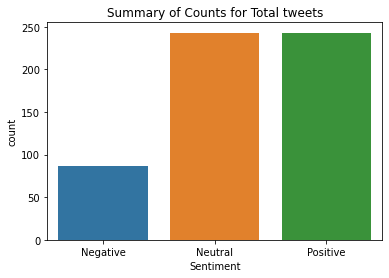

In [16]:
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")


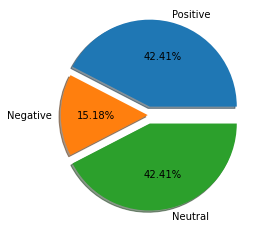

In [16]:
a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

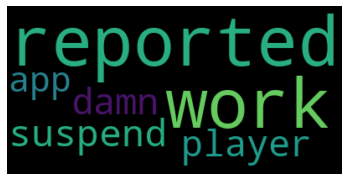

In [18]:
text = df.clean_tweet[2]

wordcloud = WordCloud(max_words=10).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Terdapat 23174 kata dalam kombinasi semua ulasan.


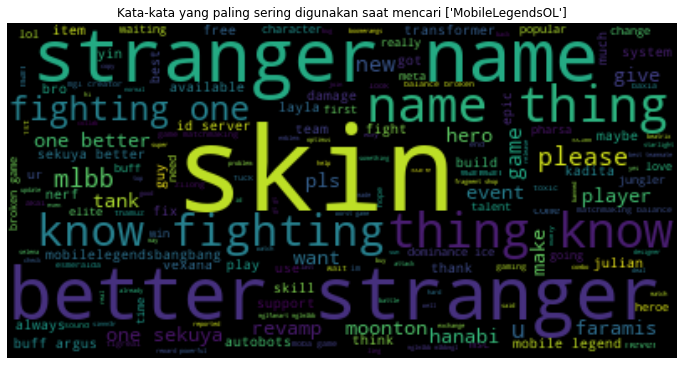

In [19]:
text = " ".join(review for review in df.clean_tweet)
print ("Terdapat {} kata dalam kombinasi semua ulasan.".format(len(text)))

stopwords = set(STOPWORDS)

text_newALL = prepCloud(text,Topic)

wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Kata-kata yang paling sering digunakan saat mencari {}".format(Topic),)
plt.axis("off")
plt.show()

Terdapat 23174 kata dalam kombinasi semua ulasan.


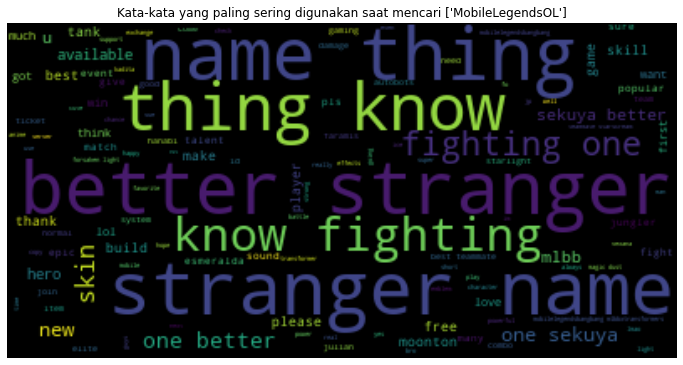

In [20]:
# wordcloud untuk tweets yang positif
text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("Terdapat {} kata dalam kombinasi semua ulasan.".format(len(text)))

text_new_positive = prepCloud(text_positive,Topic)


# Membuat gambar wordcloud
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Menampilkan gambar yang dihasilkan

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Kata-kata yang paling sering digunakan saat mencari {}".format(Topic))
plt.axis("off")
plt.show()

Terdapat 23174 kata dalam kombinasi semua ulasan.


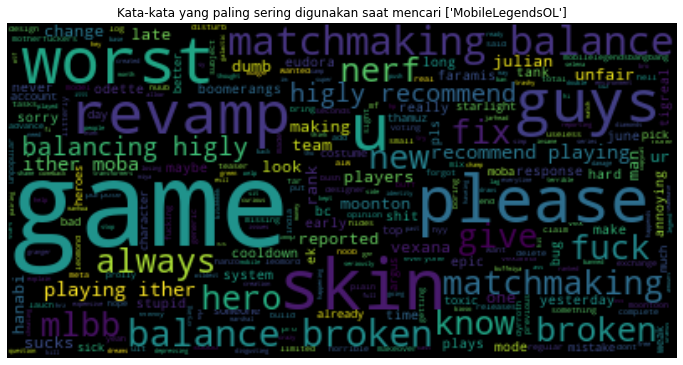

In [21]:
# wordcloud untuk tweets yang positif
text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("Terdapat {} kata dalam kombinasi semua ulasan.".format(len(text)))

text_new_negative = prepCloud(text_negative,Topic)

# # Membuat gambar wordcloud
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Menampilkan gambar yang dihasilkan

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Kata-kata yang paling sering digunakan saat mencari {}".format(Topic))
plt.axis("off")
plt.show()